In [10]:
import pandas as pd
import torch
import numpy as np

In [11]:
from mp_api.client import MPRester

with MPRester("3cc08jX8WHZOYwtfrU6KNl5urhUOy3xL") as mpr:
    docs = mpr.materials.summary.search(band_gap=(0.00001,None))


Retrieving SummaryDoc documents:   0%|          | 0/81004 [00:00<?, ?it/s]

c:\Users\ramie\AppData\Local\Programs\Python\Python311\Lib\site-packages\mp_api\client\core\client.py:829: UserWarning: Use the 'fields' argument to select only fields of interest to speed up data retrieval for large queries. Choose from: ['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_pretty', 'formula_anonymous', 'chemsys', 'volume', 'density', 'density_atomic', 'symmetry', 'property_name', 'material_id', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'formation_energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'band_gap', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up', 'dos_energy_down', 'is_magnetic', 'ordering', 'total_magnetization', 'total_magnetization_normalized_vol', 'total

KeyboardInterrupt: 

In [ ]:
print(docs[0].structure.distance_matrix)
print(docs[0].structure.atomic_numbers)
print(docs[0].structure.lattice.abc[2])
print(docs[0].structure.lattice.angles[2])
print(docs[0].band_gap)
print(docs[0].structure.cart_coords)
print(docs[0].material_id)
print(docs[0].structure.lattice)

[[0.         4.47265604 6.69441857 2.82475439 2.23632802]
 [4.47265604 0.         2.82475439 6.69441857 2.23632802]
 [6.69441857 2.82475439 0.         3.86966418 5.06108241]
 [2.82475439 6.69441857 3.86966418 0.         5.06108241]
 [2.23632802 2.23632802 5.06108241 5.06108241 0.        ]]
(89, 89, 35, 35, 8)
13.991829
90.0
0.20059999999999997
[[ 2.30647     2.30647     2.23632802]
 [ 2.30647     2.30647    11.75550098]
 [ 2.30647     2.30647     8.93074659]
 [ 2.30647     2.30647     5.06108241]
 [ 2.30647     2.30647     0.        ]]
mp-1207297
4.612940 0.000000 0.000000
0.000000 4.612940 0.000000
0.000000 0.000000 13.991829


In [ ]:
mean_atomic_numbers = []
max_atomic_numbers = []
min_atomic_numbers = []
std_atomic_numbers = []

a_parameters = []
b_parameters = []
c_parameters = []
alpha_parameters = []
beta_parameters = []
gamma_parameters = []

mean_distance_matrix = []
max_distance_matrix = []
min_distance_matrix = []
std_distance_matrix = []

band_gaps = []

In [ ]:
for i in range(len(docs)):
    
    mean_atomic_numbers += [np.mean(docs[i].structure.atomic_numbers)]
    max_atomic_numbers += [np.max(docs[i].structure.atomic_numbers)]
    min_atomic_numbers += [np.min(docs[i].structure.atomic_numbers)]
    std_atomic_numbers += [np.std(docs[i].structure.atomic_numbers)]

    # Lattice parameters:
    a_parameters += [docs[i].structure.lattice.abc[0]]
    b_parameters += [docs[i].structure.lattice.abc[1]]
    c_parameters += [docs[i].structure.lattice.abc[2]]
    alpha_parameters += [docs[i].structure.lattice.angles[0]]
    beta_parameters += [docs[i].structure.lattice.angles[1]]
    gamma_parameters += [docs[i].structure.lattice.angles[2]]

    mean_distance_matrix += [np.mean(docs[i].structure.distance_matrix)]
    max_distance_matrix += [np.max(docs[i].structure.distance_matrix)]
    min_distance_matrix += [np.min(docs[i].structure.distance_matrix)]
    std_distance_matrix += [np.std(docs[i].structure.distance_matrix)]

    band_gaps += [docs[i].band_gap]



In [ ]:
print(band_gaps)

[0.20059999999999997, 0.2363, 0.2016, 0.22000000000000064, 3.5225999999999997, 2.2729, 3.0275000000000003, 0.07939999999999969, 4.1024, 0.8071000000000002, 4.103299999999999, 4.241, 5.0865, 4.4451, 2.0031000000000008, 7.4101, 6.162600000000001, 0.9887999999999995, 2.895900000000001, 0.49099999999999966, 0.6406999999999998, 2.5886, 0.3799000000000001, 0.21850000000000014, 0.0517000000000003, 4.256600000000001, 3.3847000000000005, 0.6253000000000002, 0.25849999999999973, 2.6955, 0.7095, 0.7248000000000001, 0.1241000000000001, 0.774, 0.8722000000000003, 0.2208000000000001, 0.3277000000000001, 0.3965999999999994, 0.22229999999999994, 0.3703000000000001, 1.2258, 0.5666000000000002, 0.9837999999999998, 1.1012, 0.9809, 0.050899999999999945, 0.5615000000000001, 2.9324, 3.2651, 2.858, 0.4140999999999999, 1.6367999999999996, 0.18899999999999917, 0.3872, 0.5211999999999999, 1.6045, 1.0895, 1.0037, 0.44999999999999996, 0.4558, 0.47360000000000024, 0.7489999999999999, 0.4907999999999999, 2.5336, 2.

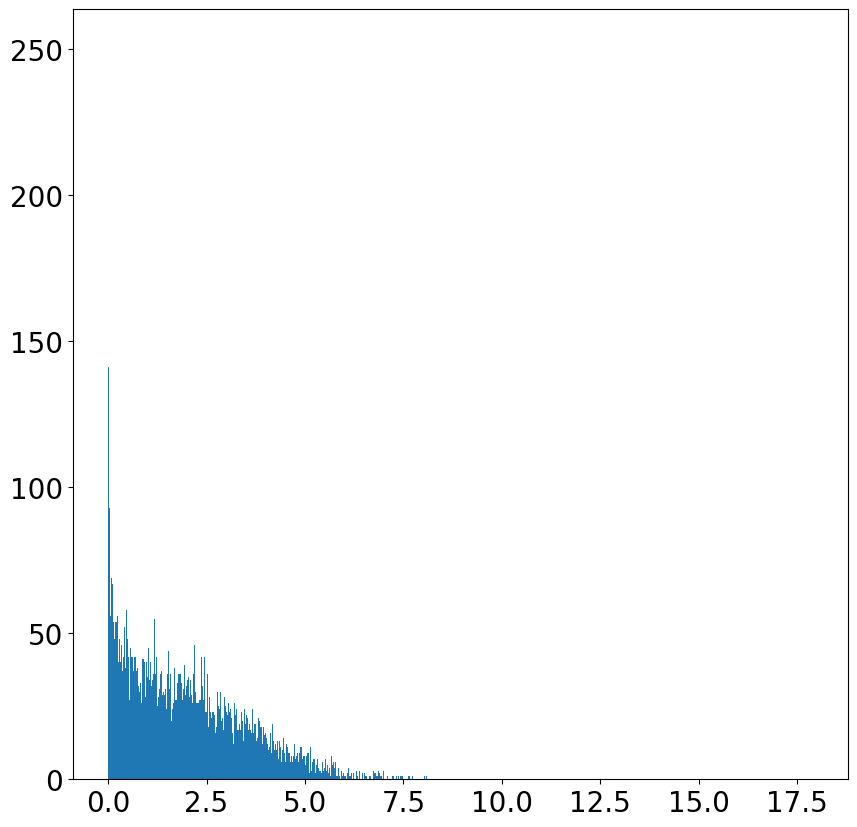

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 20})

plt.figure(figsize=(10, 10))
plt.hist(band_gaps, bins=10000)
plt.savefig('Histogram_PDF', bbox_inches='tight')

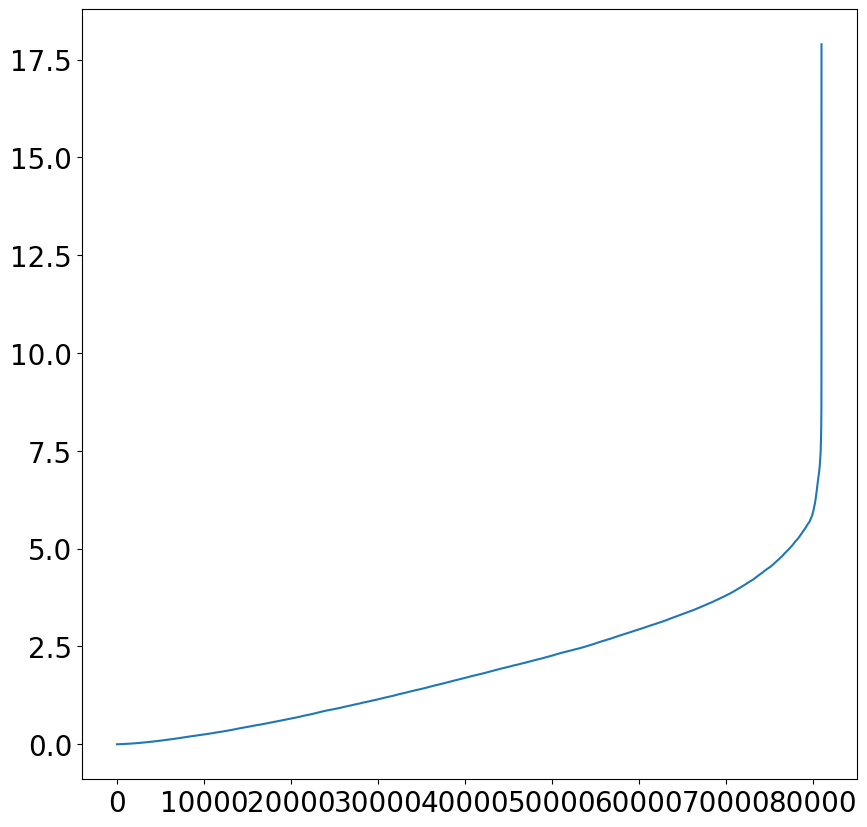

In [ ]:
band_gaps_sorted=sorted(band_gaps)

# Scatter plot
plt.figure(figsize=(10,10))
plt.plot(band_gaps_sorted)
plt.ylabel('')
plt.xlabel('')
plt.savefig('ScatterPlot', bbox_inches='tight')


In [ ]:
from sklearn.preprocessing import StandardScaler

dataset_df = pd.DataFrame({"mean_atomic_numbers": mean_atomic_numbers,
                           "max_atomic_numbers": max_atomic_numbers,
                           "min_atomic_numbers": min_atomic_numbers,
                           "std_atomic_numbers": std_atomic_numbers,
                           "a_parameters": a_parameters,
                           "b_parameters": b_parameters,
                           "c_parameters": c_parameters,
                           "alpha_parameters": alpha_parameters,
                           "beta_parameters": beta_parameters,
                           "gamma_parameters": gamma_parameters,
                           "mean_distance_matrix": mean_distance_matrix,
                           "max_distance_matrix": max_distance_matrix,
                           "min_distance_matrix": min_distance_matrix,
                           "std_distance_matrix": std_distance_matrix
                           })

scaler = StandardScaler().fit(dataset_df)

scaled_dataset_df = scaler.transform(dataset_df)

from sklearn.model_selection import train_test_split

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    scaled_dataset_df, band_gaps, test_size=.2, random_state=None)

dataset_df.to_csv("Ihatethisproject.csv", index =False)

Random Forest MSE	1.0445500531404985

Random Forest R2	0.5649192240354923



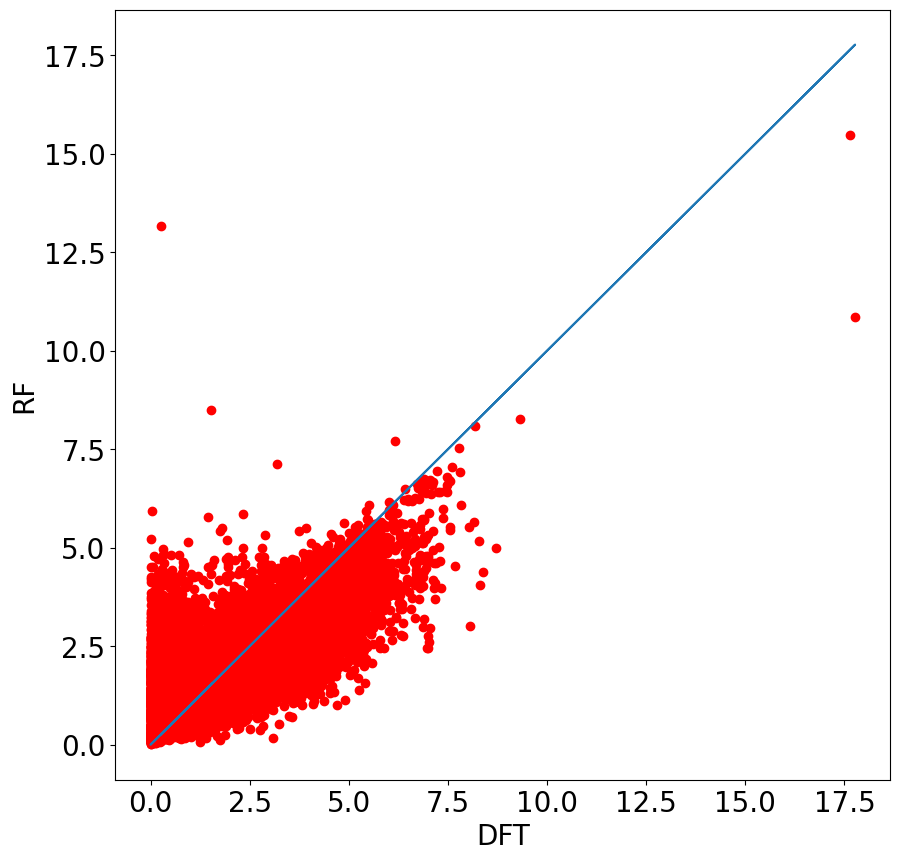

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=500, max_depth=500, random_state=0)
regr.fit(X_train_scaled, y_train)
y_predicted = regr.predict(X_test_scaled)

print('Random Forest MSE\t'+str(mean_squared_error(y_test, y_predicted))+'\n')
print('Random Forest R2\t'+str(r2_score(y_test, y_predicted))+'\n')

xPlot=y_test
yPlot=y_predicted
plt.figure(figsize=(10,10))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('RF')
plt.xlabel('DFT')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')S